In [63]:
import pandas as pd
import cv2
import numpy as np
import faiss

### COLOR HISTOGRAMS

In [64]:
paths_db = pd.read_csv("database/db.csv", index_col=0)
paths = paths_db['path'].values.tolist()

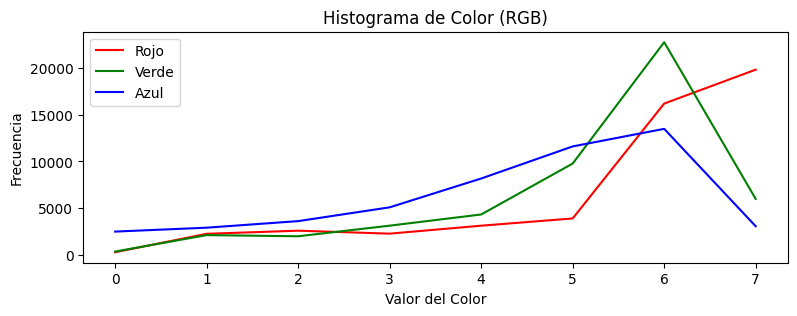

In [65]:
import matplotlib.pyplot as plt

img = cv2.imread(paths[0])

bins = 8

hist_r, bins_r = np.histogram(img[:, :, 0], bins=bins, range=(0, 255))
hist_g, bins_g = np.histogram(img[:, :, 1], bins=bins, range=(0, 255))
hist_b, bins_b = np.histogram(img[:, :, 2], bins=bins, range=(0, 255))

plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.title('Histograma de Color (RGB)')
plt.plot(hist_r, color='red', label='Rojo')
plt.plot(hist_g, color='green', label='Verde')
plt.plot(hist_b, color='blue', label='Azul')
plt.xlabel('Valor del Color')
plt.ylabel('Frecuencia')
plt.legend()

In [66]:
vec = create_vector(hist_r, hist_g, hist_b)
len(vec)

512

In [67]:
def create_vector(histR, histG, histB):
    new_vector = []
    for freqR in histR:
        for freqG in histG:
            for freqB in histB:
                new_vector.append(freqR + freqG + freqB)

    return np.array(new_vector, dtype=np.float32)

In [68]:
color_histograms = []
dimension = 512

for path in paths:
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hist_r, bins_r = np.histogram(img[:, :, 0], bins=bins, range=(0, 255))
    hist_g, bins_g = np.histogram(img[:, :, 1], bins=bins, range=(0, 255))
    hist_b, bins_b = np.histogram(img[:, :, 2], bins=bins, range=(0, 255))

    color_histogram = create_vector(hist_r, hist_g, hist_b)
    
    color_histograms.append(color_histogram)

In [70]:
index = faiss.IndexFlatL2(dimension)

vectores = np.array(color_histograms)

print(vectores[0].shape)
faiss.normalize_L2(vectores)

index.add(vectores)

(512,)


In [71]:
faiss.write_index(index, "database/color_histograms.index")